# Lektion 3 - Übung 2

Import von Python-Bibliotheken und notwendiger Code für diverse Funktionen

In [8]:
## imports
import math
import pandas as pd
from IPython.display import HTML, display


## Der folgende Code dient zur Implementierung der Funktionalität, damit Code ein- und ausgeblendet werden kann.
def toggle_code():
    toggle_code_js_html = '''
    <script>
    function code_toggle() {
        if ($('div.cell.code_cell.rendered.selected div.input').css('display')!='none'){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
    }
    </script>
    <form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Code ein-/ausblenden"></form>
    '''
    display(HTML(toggle_code_js_html))


toggle_code()

# Aufgabentext

Im Rahmen einer wissenschaftlichen Analyse soll der Zusammenhang zwischen Jahresgewinn (Merkmal X) und Jahresmiete für die EDV-Anlage (Merkmal Y) beurteilt werden. Dazu wurden in einer bestimmten Branche 15 Unternehmen befragt. Das Ergebnis ist:

|Unternehmen|Jahresgewinn (in Mio. €)|Jahresmiete (in 1000 €)|
|---        |---                     |---                    |
|1          |10                      |30                     |
|2          |15                      |30                     |
|3          |15                      |100                    |
|4          |20                      |50                     |
|5          |20                      |100                    |
|6          |25                      |80                     |
|7          |30                      |50                     |
|8          |30                      |100                    |
|9          |30                      |250                    |
|10         |35                      |180                    |
|11         |35                      |330                    |
|12         |40                      |200                    |
|13         |45                      |400                    |
|14         |50                      |500                    |
|15         |50                      |600                    |

Analysieren Sie den Zusammenhang mit Hilfe des Ihnen bekannten Instrumentariums.

# Lösung

|i           |$$ x_i $$|$$ y_i $$|$$ x_i - \bar{x} $$|$$ y_i - \bar{y} $$|$$ (x_i - \bar{x})^2 $$|$$ (y_i - \bar{y})^2 $$|$$ (x_i - \bar{x})(y_i - \bar{y}) $$|
|---         |---      |---      |---                |---                |---                    |---                    |---                                 |
|1           |10       |30       |-20                |-170               |400                    |28900                  |3400                                |
|2           |15       |30       |-15                |-170               |225                    |28900                  |2550                                |
|3           |15       |100      |-15                |-100               |225                    |10000                  |1500                                |
|4           |20       |50       |-10                |-150               |100                    |22500                  |1500                                |
|5           |20       |100      |-10                |-100               |100                    |10000                  |1000                                |
|6           |25       |80       |-5                 |-120               |25                     |14400                  |600                                 |
|7           |30       |50       |0                  |-150               |0                      |22500                  |0                                   |
|8           |30       |100      |0                  |-100               |0                      |10000                  |0                                   |
|9           |30       |250      |0                  |50                 |0                      |2500                   |0                                   |
|10          |35       |180      |5                  |-20                |25                     |400                    |-100                                |
|11          |35       |330      |5                  |130                |25                     |16900                  |650                                 |
|12          |40       |200      |10                 |0                  |100                    |0                      |0                                   |
|13          |45       |400      |15                 |200                |225                    |40000                  |3000                                |
|14          |50       |500      |20                 |300                |400                    |90000                  |6000                                |
|15          |50       |600      |20                 |400                |400                    |160000                 |8000                                |
|            |         |         |                   |                   |                       |                       |                                    |
|$$ \sum{} $$|450      |3000     |0                  |0                  |2250                   |457000                 |28100                               |
|Mittelwert  |30       |200      |                   |                   |                       |                       |                                    |


## Mittelwert

$$ \bar{x} = \frac{1}{n} \sum_{i=1}^n{ x_i } $$

In [1]:
x_quer = 450 / 15
print(x_quer)

30.0


In [2]:
y_quer = 3000 / 15
print(y_quer)

200.0


## Varianz

$$ s_x^2 = \frac{1}{n} \sum_{i=1}^n{ (x_i - \bar{x})^2 } $$

In [5]:
var_x = 2250 / 15
print(var_x)

150.0


In [4]:
var_y = 457000 / 15
print(var_y)

30466.666666666668


## Standardabweichung

$$ s_x = \sqrt{s_x^2} $$

In [9]:
std_x = math.sqrt(var_x)
print(std_x)

12.24744871391589


In [10]:
std_y = math.sqrt(var_y)
print(std_y)

174.5470328211473


## Kovarianz

$$ c_{XY} = \frac{1}{n} \sum_{i=1}^n{ (x_i - \bar{x}) (y_i - \bar{y}) } $$

In [11]:
cov_xy = 28100 / 15
print(cov_xy)

1873.3333333333333


## Korrelationskoeffizient

$$ r_{XY} = \frac{ c_{XY} }{ s_X s_Y } $$

In [12]:
corr_xy = cov_xy / (std_x * std_y)
print(corr_xy)

0.8763083719514775


In [13]:
corr_xy = 28100 / 15 / (math.sqrt(2250 / 15) * math.sqrt(457000 / 15))
print(corr_xy)

0.8763083719514775


# Streudiagramm

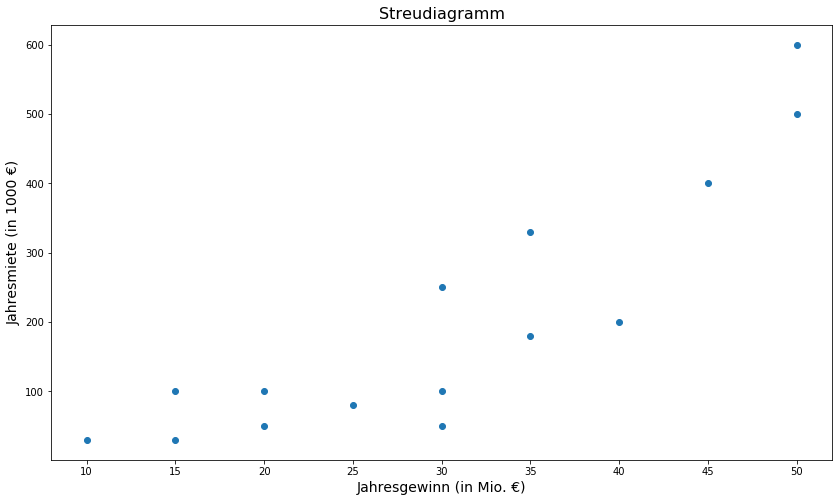

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
%matplotlib inline

x_values = [10, 15, 15, 20, 20, 25, 30, 30, 30, 35, 35, 40, 45, 50, 50]
y_values = [30, 30, 100, 50, 100, 80, 50, 100, 250, 180, 330, 200, 400, 500, 600]

plt.figure(figsize=(14, 8))
plt.scatter(x=x_values, y=y_values)
plt.title('Streudiagramm', size=16)
plt.xlabel('Jahresgewinn (in Mio. €)', size=14)
plt.ylabel('Jahresmiete (in 1000 €)', size=14)

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))

plt.show()

toggle_code()